# Exercises of Chapter 1

## P4 ex1.1

1. Medical diagnosis:
  - 输入空间X：病人的症状。
  - 输出空间Y：病人得了啥病
2. Handwritten digit recognition
  - 输入空间X：邮政编码的数字图片 pixel
  - 输出空间Y：数字（到底是什么数字）
3. Determining if an email is spam or not
  - 输入空间X：邮件（内容）
  - 输出空间Y：是垃圾邮件还是非垃圾邮件
4. Predicting how an electric load varies with price, temperature, and day of the week
  - 输入空间X：price, tepmerature, and day of the week
  - 输出空间Y：electric load
5. A problem of interest to you fr which there is no analytic solution, but you have data from which to construct an empirical solution.
  - X：data of problem
  - Y：solution

## P6 ex1.2

a. 广告，购物，情色，发票，商店，打折，影片...
b. 亲人，学习，...
c. Threshold or b

## P7 ex1.3

a. 如果x(t)被错分，实际的y(t)和$$\vec w^T(t)\vec x(t)$$异号，即$$y(t)\vec w^T(t)\vec x(t) < 0$$，要不然就分类正确。
b. $$\begin{align}
y(t) \vec w^T(t+1) \vec x(t) &= y(t)[\vec w^T(t)+y(t)\vec x(t)] \vec x(t) \\
&= y(t)\vec w^T(t) \vec x(t) + y^2(t) \vec x^T(t) \vec x(t) \\
& >  y(t)\vec w^T(t) \vec x(t)
\end{align}$$ （第二项大于0）
c. 从a和b可以看出，如果x(t)被错分，则会修正权重$$\vec w(t+1) = \vec w(t) + y(t)\vec x(t) $$, $$y(t)\vec w^T(t) \vec x(t)$$从原来的 $$<0$$，慢慢会变成 $$>0$$. 最后 $$y \vec w^T x > 0$$, x 被正确分类。


## P8 ex1.4

产生数据，使用python编程来尝试一些。

In [1]:
%matplotlib inline

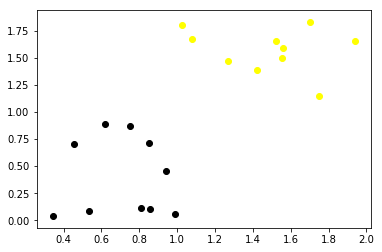

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data_1 = np.random.rand(10, 2)
data_2 = np.random.rand(10, 2) + 1

plt.scatter(data_1[:, 0], data_1[:,1], c='black')
plt.scatter(data_2[:, 0], data_2[:,1], c='yellow')

In [3]:
import pandas as pd

df = pd.DataFrame(data_1)
df2 = pd.DataFrame(data_2)
df = df.append(df2, ignore_index=True)

In [4]:
df.shape

(20, 2)

In [5]:
def creat_label():
    label = []
    for i in range(0,20):
        if i < 10:
            label.append(-1)
        else:
            label.append(1)
    return label

label = creat_label()
label

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [6]:
len(label)

20

In [7]:
a = np.array(label)

type(a)
df2 = pd.DataFrame(a)
df2

,0
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [8]:
df['label'] = df2

In [9]:
df

,0,1,label
0,0.990524,0.054373,-1
1,0.620654,0.887699,-1
2,0.853485,0.714406,-1
3,0.807625,0.116543,-1
4,0.532413,0.084450,-1
5,0.749864,0.874287,-1
6,0.346916,0.035263,-1
7,0.943622,0.455440,-1
8,0.456648,0.705626,-1
9,0.858830,0.104357,-1


In [10]:
dataset = df.values

X = dataset[:, 0:2].astype(float)
Y = dataset[:, 2]

In [11]:
X.shape

(20L, 2L)

In [12]:
from sklearn.linear_model import Perceptron

# random 
seed = 42
np.random.seed(42)

# Create model
pla = Perceptron(n_iter=50, verbose=0, random_state=seed, fit_intercept=True, eta0=0.002)
pla.fit(X, Y)

# print results
print('Prediction' + str(pla.predict(X)))
print('Actual' + str(Y))
print('Accuracy' + str(pla.score(X, Y)*100) + '%')

Prediction[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]
Actual[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]
Accuracy100.0%


In [13]:
# output the values
print "Coef 0(w_1):" + str(pla.coef_[0,0]) 
print "Coef 1(w_2):" + str(pla.coef_[0,1])
print "Bias" + str(pla.intercept_)

Coef 0(w_1):0.00138497280103
Coef 1(w_2):0.0040246437505
Bias[-0.006]


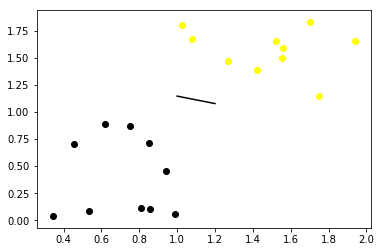

In [14]:
# plot 
plt.scatter(data_1[:, 0], data_1[:,1], c='black')
plt.scatter(data_2[:, 0], data_2[:,1], c='yellow')

# Calc the hyperplane
w = pla.coef_[0]
a = -w[0] / w[1]
w_0 = pla.intercept_[0]
x = np.linspace(1, 1.2)
y = a*x -(w_0) / w[1]

# plot the line
plt.plot(x, y, 'k-')


## p17 ex1.7

**The purpose of the exercise is to show what can possibly happen outside the data, namely anything, and it is the same no matter how you pick your g from the data.**

a. 全是黑点和全是白点的H 与 g 总非训练样本上的差异。若H全是黑点，则与8个可能的g在非训练样本上预测的差别：H与g在三个点预测全错的g个数为1个，H与g在一个点上预测一样的g个数3个，H与g在两个点上预测一样的g个数为3个，H与g在三个点上预测一样的g的个数为1个。 全是白点一样的道理。（1-3-3-1）  
b. 若选择匹配数据集最少的假设，则选择全是白点的，结果是和上面一样。  
c. H是异或逻辑集。则H在未知样本上的预测f2一样。  
d.  the learning a lgorith m picks the hypothesis that agrees with a l l training examples, but otherwise disagrees the most with the XOR. H包含所有可能的假设，而算法选择的是：在训练机集上，h(x)结果一样的假设，而在未知数据上的与XOR差别最大的假设。即f7，f7在训练集上预测为XOR逻辑，而在未知数据上，预测完全与XOR逻辑相反（差异最大）。  

## p19 ex1.8:

> If µ = 0.9, what is the probability that a sample of 1 marbles will h ave v <= 0.1? [Hints: 1. Use binomial distribution. 2. Te answer is a ver small number.]

有放回的取10个弹球, 其中全是绿色球X=0和只有一个是红色球X=1的概率。X表示红色球数目。

$$P(\nu <= 0.1) = P(X=0) + P(X=1) = 0.1 ^ 10 + C_10^1 \cdot 0.9 \cdot 0.1^9 = 9.1 \cdot 10^{-9}$$

## P19 Exercise 1.9

> If µ = 0 .9, use the Hoeffding I nequality to bound the probability that a sample of 10 marbles will have v <= 0.1 and compare the a nswer to the previous exercise.

$$P(\rvert \nu - \mu \rvert ) > 0.8^{-}) \leq 2e^{-2*0.8^2*10} = 5.5 * 10^{-6}$$

## P23 ex1.10

不理解如何进行试验，问题到底是什么意思

## P25 ex1.11

**训练集**：给定训练集D的样本数为25.

**未知的目标函数** $$f: X \rightarrow Y, \ X = \boldsymbol R, \\ Y=\{-1, +1\}$$

**假设集**: 为了学习得到未知的目标函数f, 使用简单的假设集 $$H = \{h_1, h_2\}$$, 其中$$h_1=+1$$(任何训练样本输入进来，输出都为+1); $$h_2=-1$$(如何训练样本输入进来，输出都为-1).

**学习算法**：S(smart) 和 C(cracy).

- S 算法对于训练集中样本类别数多的就判别为该类别, 即如果训练集中类别为+1的样本数>类别为-1的样本数目, 则算法S将选择$$h_1$$假设作为g, 反之则选择$$h_2$$.
- C 算法就是个“疯子”, 所做所谓与S相对,只要S选了$$h_1$$假设, 则C算法就故意选$$h_2$$假设作为g.

**概率分布**: 我们要从确定性观点和概率的观点看看这些算法在训练样本上的性能. 从概率的角度来看:X上存在概率分布,其 $$P[f(x)=1] = p$$.

> a) Can S produce a hypothesis that is guaranteed to perform better than random on any point outside D?

NO. 无法保证. 极端例子, D中所有样本 yn=+1.

> b) Assume for the rest of the exercise that all the examples in have Yn = 1. Is it possible that the hypothesis that C produces turns out to be better than the hypothesis that S produces?

Yes. 算法S确定的假设为h1,而算法C确定的假设为h2. 那么在未知数据上, C的性能有可能比S的性能好.

> c) If p = 0.9, what is the probability that S will produce a better hypothesis than C?

p = 0.9 即 $$P(f(x)=+1) = 0.9$$, X 中有90%的概率能抽出类别为+1的样本,有10%的概率能抽出类别为-1的样本. 我们要求的是: $$P(P(h_S(x) = f(x)) > P(h_C(x) = f(x)))$$ 这个概率. x 为 outside D. 训练集以外的样本.$$h_S, h_C$$分别为算法C,D在训练集上训练得到的假设.

现在我们已知的量有哪些呢?

- D所有中所有样本 yn = +1.------> $$h_S = h_1, h_C = h_2$$.
- 因为 $$P(f(x)=+1) = 0.9 \rightarrow P(h_S(x) = f(x)) = 0.9$$
- 因为 $$P(f(x)=-1) = 0.1 \rightarrow P(h_C(x) = f(x)) = 0.1$$

因为: 0.9 > 0.1 所以 $$P[P(h_S(x) = f(x)) > P(h_C(x) = f(x))] = 1$$

> d)  Is there any value of p for which it is more likely than not that C will produce a better hypothesis than S?

前提还是要记住: 所有训练样本的yn=+1. 仍延续 b, c的条件和结论

问题是:  如果要 $$P(h_S(x) = f(x)) < P(h_C(x) = f(x))$$, 则p的取值如何.

因为: $$P(h_S(x) = f(x)) = p, \ P(h_C(x) = f(x)) = 1-p$$. 则 $$p < 1-p \rightarrow p< 0.5$$

> 练习总结:

其实从这4个问题中,我们可以发现,对于a问题,我们不确定训练样本D中yn的情况,我们就无法确定算法S在训练集D上得到的假设在X上的性能就好于C算法的情况.

但如果我们确定D中样本的情况,比如已知所有样本yn=+1, 则我们知道S和C算法得到的假设.

进一步下去, 如果我们知道 outside D 以外的样本 X 的概率分布, 那么我们可以进一步确定, S算法和C算法得出假设在 X 上的性能情况.

从中可以看出, 训练样本情况和X的概率分布情况, 在某种程度影响着算法的性能(在outside D上).

## P26 ex1.12

问题: learning problem, 目标函数 f 未知, 已知4000个数据. 我们要得到hypothesis g 来尽可能趋近 f. What is the best that you can promise her among the fllowing:

> a. After learning you will provide her with a g that you will guarantee approximates well out of sample.

> b. After learning you will provide her with a g, and with high probability
the g which you produce will approximate well out of sample.

> c.  One of two things wil l happen.
>    - you will produce a hypothesis g
>    - you will declare the you failed.
>    if you do return a hypothesis g, then with high probability the g which you produce will approximate f well out of sample.

a. 从ex1.11的练习中, 我们可以看出 a中 我们是无法保证的.
b. 还是从练习1.1.中, 我们发现, 只要在知道这4000个数据集D的情况 以及 未知样本X的概率分布情况, 我们才能得到相关的概率.
c. 综合来看, c答案可能是一个比较好的选项.(未知数据的不确定性.)

或许,我们能给出的只有 Hoeffding Inequality.

但是, 可不可以有这样的答案呢?

> d. With high probability: you will either say you failed or you will produce a good g.

## P31 EX1.13

已知: h & target f, and $$P(h(x) \neq f(x)) = \mu, P(h(x)=f(x)) = 1 - \mu$$, we use the same h to a pproximate a noisy version of f given by

$$P(y|x) = \begin{cases}
\lambda & y=f(x)\\
1 - \lambda & y \neq f(x)\end{cases}$$

> a) what is the probability of error that h makes in approximating y if we use a noisy version of f.

要求: $$P(h(x) \neq y)$$

- 第一种情况: $$h(x) = f(x), y \neq f(x)$$, 其概率: $$P_1 = (1-\mu)(1-\lambda)$$;
- 第二种情况: $$h(x) \neq f(x), y = f(x)$$, 其概率: $$P_2 = \mu \lambda$$

所以  $$P(h(x) \neq y) = P_1 + P_2 = \mu(2\lambda -1) - \lambda + 1$$

> b) At what value of A will the perfrmance of h be independent of µ?

也就是h的性能与u无关, 那么就是$$P(h(x) \neq y)$$的值与u无关, 即u的系数为0, 则$$2\lambda -1 = 0 \rightarrow \lambda = 0.5$$.


# Problems

## Prob 1.1 

条件概率, 利用贝叶斯公式.  $$P(A, B) = P(A \mid B)P(B) = P(B \mid A) P(A)$$

已知: 
    
- 两个不透明的两个bag, bag1(两个黑球), bag2(1个黑球, 1个白球)
- 第一次随机选择一个BAG, 取出来是黑球

问: 

- 第二次在相同的BAG中取出黑球的概率是多少?

答:

1. 随机选择一个bag, 令变量bag1表示选择bag1, bag2表示选择bag2, 则$$P(bag1) = 0.5, P(bag2)=0.5$$;
2. 令变量black表示取黑球事件, black1 表示取出第一次取出黑球, 则 $$P(black1) = P(bag1) + P(bag2)P(black|bag2)=0.5 + 0.5 \cdot 0.5 = 0.75$$
3. 现在要求第二次取出的是黑球(black2)的概率:P(black2|black1)

$$P(black2|black1) = \frac{P(black2, black1)}{P(black1)}$$

(black2, black1) 第一次取出黑球, 第二次也取出黑球的事件 

$$P(black2, black1) = P(bag1) * P(black) = 0.5 * 1 = 0.5$$

所以, $$P(black2|black1)=\frac{0.5}{0.75} = \frac{2}{3}$$

## Prob 1.2 

a) $$x_2 = a x_1 +b \rightarrow 0 = 1b + ax_1 - x_2$$ 

then: $$w_0 =b, w_1 = a, w_2=-1$$ 

b) 在二维平面内画出:

(1): $$1+2x_1 + 3x_2=0$$
(2): $$-(1+2x_1+3x_2)=0$$

两者划分正好相反

## Prob 1.3

已知: $${w^*}$$为PLA算法划分数据的一个权重集

a) 证: $$\rho = \min_{1 \leq n \leq N} y_n({w^{*}}^T x_n) > 0$$, 

参考 exercise 1.3, $$x_n, y_n$$ 被正确划分, $${w^*}^T x_n$$的符号和$$y_n$$相同, 有 $$\rho > 0$$

b) 证: $$w^T(t) w^* \geq w^T(t-1) w^* + \rho$$ 并得出结论 $$w^T(t) w^* \geq t \rho$$

$$\begin{align}
w^T(t)w^* &=(w(t-1)+y_n \boldsymbol x_n)^T w^* \\
          &= {w^*}^T (w(t-1)+y_n \boldsymbol x_n)^T \\
          &\geq {w^*}^T w(t-1) + y_n {w^*}^T \boldsymbol x_n \\
          &\geq {w^*}^T w(t-1) + \rho
\end{align}$$

再一步步推演下去$$w^T(t-1)w^* \geq {w^*}^T w(t-2) + \rho$$

可得到$$ w^T(t)w^* \geq {w^*}^T w(t-t) + t\rho$$

又 $$w(0) = 0$$, 所以: $$ w^T(t)w^* \geq t \rho$$

c) because: $$w(t) = w(t-1) + y(t-1) x(t-1)$$, 等式左右两边都是向量, 向量的模等于向量的内积, 那么其模如下
 
 $$\|y(t-1) \| = 1, y(t-1) w(t-1)^T x(t-1) \leq 0$$
 
$$\begin{align} 
\|w(t)\|^2 &= \|w(t-1) + y(t-1)x(t-1)\| ^2 \\
           &= \|w(t-1)\|^2 +  2 y(t-1) w(t-1)^Tx(t-1) + \|y(t-1)x(t-1)\|^2 \\
           &\leq \|w(t-1)\|^2 + \|x(t-1)\|^2 
\end{align}$$

d) 利用归纳法

$$\begin{align} 
\|w(t)\|^2 &\leq \|w(t-1)\|^2 + \|x(t-1)\|^2  \\
           &\leq \|w(t-2)\|^2 + \|x(t-2)\|^2 + \|x(t-1)\|^2 \\
           &\leq \|w(t-t)\|^2 + \|x(t-t)\|^2 + \cdots + \|x(t-1)\|^2 \\
           &\leq 0 + n \cdot \max\|x\|^2 
\end{align}$$

其中 $$R = \max_{1 \leq n \leq N} \|x_n\|$$

则: $$\|w(t)\|^2 \leq t R^2$$

e) 使用b和d的结论:

$$ w^T(t)w^* \geq t \rho$$
$$\|w(t)\|^2 \leq t R^2$$

有:

$$ \frac{w^T(t)}{\|w(t)\|}w^* \geq \frac{t\rho}{\sqrt{tR^2}} = \sqrt{t} \cdot \frac{\rho}{R}$$

因此, 

$$\begin{align}
t &\leq \frac{R^2}{\rho ^2} \frac{(w^T(t)w^*)^T (w^T(t)w^*)}{\|w(t)\|^2} \\
   &\leq \frac{R^2}{\rho ^2} \cdot \frac{(\|w(t)\| \|w^*\|)^2}{\|w(t)\|^2} = \frac{R^2 \|w^*\|^2}{\rho ^2}
\end{align}$$

因:
$$\begin{align} 
\frac{w^T(t)w^*}{\|w(t)^T w^*\|} = 1 &\Rightarrow w^T(t)w^* = \|w(t)^T w^*\| \\
    &\Rightarrow w^T(t)w^* \leq \|w(t)^T\| \|w^*\| 
\end{align}$$

$$\frac{w^T(t)w^*}{\|w(t)\|\|w^*\|} \leq 1 $$



## Prob 1.4

python 编程实现, 暂且遗留. 

实现PLA的极简模式, 一步一步探究过程.

## Prob 1.5

Like prob 1.4 coding later

## Prob 1.6

red-green marble, out-of-sample, red marble$$ P(red \ in \ \cal X) = \mu=0.05, 0.5, 0.8$$, 计算下列情况下 in-sample 中red marble 的概率 $$\nu$$

**a)** 只从整个输入空间中,取出一个sample, 其 不是red marble 的概率

从总输入空间中去一个样本, 它不是red marble(是green marble)的概率: $$P=1-P(red \ in \cal X) = 1 - \mu$$

**b)** 从整个输入空间中, 取出1000个样本samples, 计算其中至少有一个样本不是红色的概率, 也就是至少有一个样本为绿色的概率 P, 1-P = 事件(样本中的球都是红球)发生的概率

$$P = 1 - \mu^{1000}$$

**c)** 若b的样本数目改为 1,000,000 呢?

$$P = 1 - \mu^{1,000,000}$$

## Prob 1.7

只有1个硬币时, 抛10次, 没有一个硬币出现 Head.

a) 1个硬币抛N=10次,at least one coin will have $$\nu=0$$ 也就是至少有一个硬币有head(事件A). 逆向思考: P(A) = 1 - P(B:没有一个硬币出现head).

$$P(A) = 1 - P(B) = 1 - \binom N 0 \mu^0 (1-\mu)^{N-0}$$

那么对于1000个硬币, N=10 是什么意思呢? 是1000个硬币抛10次? 如果是这样, 每个硬币各抛10次, 1000个硬币各抛10次, P(A) = 1 - P(B). 现在关键是如何在这种情况下求P(B).

- 一个硬币抛10次, 没有一个硬币出现head的概率为P(B)
- 相当于, 这个操作重复1000次, 只不过是其他999个硬币, 但这有什么区别呢?没有啊
- 那么继续下去, 这就是另外一个二项分布, P(B), 与1-P(B), n = 1000, 如果n中的某一个出现(1-P(B)), 那么就是出现有一个硬币有head.

对于1个硬币, 抛10次, 没有出现head的概率为 $$ P(B) = \binom {10} {0} \mu^0 (1-\mu)^{10-0}$$

那么对于1000个硬币, 抛10次, 后 $$\nu=0$$ 的概率为:

$$1 - \binom {1000} {1000} P(B)^{1000} (1-P(B))^0$$

对于1,000,000个硬币和$$\mu = 0.8$$类似

对于问题 B 的理解: (参考书籍论坛 [Stuck on Problem 1.7 - LFD Book Forum](http://book.caltech.edu/bookforum/showthread.php?t=4414))

2个硬币, 各抛6次, 它们又是相互独立而抛(两个硬币出现head的概率$$\mu=0.5$$).比如:

- 实验1: 第一个硬币抛6次, 出现3次head, $$\nu_1 = 0.5$$
- 试验2: 第二个硬币抛6次, 出现2次head, $$\nu_2 = \frac{1}{3}$$

因此: 

$$d_1 = \mid \nu_1 -\mu_1 \mid = 0, d_2 = \mid \nu_2 - \mu_2 \mid = \frac{1}{6}$$

$$d = \max_I \mid \nu_i - \mu_i \mid = \max(d_1, d_2) = \frac{1}{6}$$

我们要计算的是 $$P(d > \epsilon)$$

$$A = (|\nu_1 - \mu_1| > \epsilon), B = (|\nu_2 - \mu_2| > \epsilon)$$

$$\begin{align}
P[max(\nu_i - \mu_i) > \epsilon] \leq P[A or B] &= P[A] + P[B] -P[A \ and \ B] \\
&\leq 2(2e^{-2\epsilon^2 N}) - P[A \ and \ B] \\
&\leq 2(2e^{-2\epsilon^2 N})
\end{align}$$

概率计算参考: [顽想学概率一-2w-极简公理-条件概率 · Anifacc](https://anifacc.github.io/math/probability/2017/04/21/Axiom-Conditional-Probability/)



# Prob 1.8

a 马尔科夫不等式 参考 [切比雪夫不等式到底是个什么概念? - 知乎](https://www.zhihu.com/question/27821324)

假如 t 为连续的随机变量, t > 0, 其概率密度函数PDF为f(t), 累积分布函数为 F(t)则

$$\begin{align} 
P(t \geq a) &= F(\infty) - F(a) \\
        &= \int_{0}^{\infty} f(t)dt - \int_{0}^{a}f(t)dt \\
        &= \int_{a}^{\infty}f(t)dt
\end{align}$$

期望 

$$\begin{align} 
E(t) &= \int_{0}^{\infty}tf(t)dt \\
    &= \int_{0}^{a}tf(t)dt + \int_{a}^{\infty}tf(t)dt \\
    &\geq 0 + a\int_{a}^{\infty}f(t)dt \\
    &\geq aP(t\geq a) \\
\end{align}$$

so: $$P(t \geq a) \leq \frac{E(t)}{a}$$

b) 利用a的结果, 令 $$x = u-\mu, t= x^2>=0$$

则: $$P(t \geq a) \leq \frac{E(t)}{a}$$

$$E(t) = E[(u-\mu)^2] = \sigma^2$$

so, 

$$P(t \geq a) \leq \frac{\sigma^2}{a}$$

c) 随机变量 $$u_1, u_2, ..., u_N$$ 均值和方差 分别为$$\mu, \sigma^2$$

若他们相互独立, 则 $$u_1 + u_2 + ... + u_N$$ 的均值和方差分别为 $$N\mu, N\sigma^2$$

变量 $$u = \frac{1}{N} \sum_{n=1}^{N}u_n$$ d的均值和方差分别为:$$\mu, \frac{\sigma^2}{N}$$

利用(a)(b)的结果, 可以得到:

$$\Bbb P [(u-\mu)^2 \geq a] \leq \frac{\sigma^2/N}{a} = \frac{\sigma^2}{Na}$$

## Prob 1.9

(a). 利用 Prob1.8 (a)的结论, t 是(有限的)随机变量, a 是正的常数, s为正的参数

$$e^{st}$$肯定为正的随机变量, $$e^{sa}>0$$

$$\Bbb P[e^{st} \geq e^{sa}] \leq \frac{\Bbb{E_t}(e^st)}{e^{sa}} \Rightarrow
\Bbb P[t \geq a] \leq \frac{\Bbb{E_t}(e^st)}{e^{sa}}=e^{-sa}T(s)$$

(b). $$\begin{align}
\Bbb P [u \geq a] &= \Bbb P[\frac{1}{N}\sum_{n}u_n \geq a] \\
 &= \Bbb P[\sum_{n}u_n \geq Na] \\
 &= \Bbb P[e^{s\sum_{n}u_n} \geq e^{sNa}] \\
 &\leq \frac{\Bbb E(e^{s\sum_n{u_n}})}{e^{sNa}} & Markov \ inequality(conditions \ are \ ok)\\
 &= \frac{\Bbb E(\prod_n e^{su_n})}{e^{sNa}} \\
 &= \frac{\prod_n {\Bbb E(e^{u_n})}}{e^{sNa}} \\
 &= (e^{-sa}U(s))^N
     \end{align}$$

(c).$$P[u_n=0] = P[u_n=1] = 0.5$$

then $$P[e^{s u_n} = 1] = P[e^{s u_n} = e^s] = 0.5$$

then, $$U(S) = E_{u_n}[e^{s u_n}] = 0.5*1 + 0.5*e^s = \frac{1}{2}(1+e^s)$$

利用 b 的结论, 

$$P[u_n \geq a] \leq e^{-sa} U(s)$$

因为: $$0 < a < 1$$ 

$$P[u_n \geq a] = P[u_n = 1] = \frac{1}{2} \leq e^{-sa}U(s)$$

所以 $$ \min {e^{-sa}U(s)} = \frac{1}{2}$$ 

$$\begin{align}
e^{-sa}U(s) &= \frac{1}{2}(e^{-sa}+e^{(1-a)s}) 
\end{align}$$

(d) I can't fix it. then 放着再说

## Prob 1.10

**a)** M为偶数的情况: $$E_off = 0.5$$

M为奇数, N为偶数: $$E_off = \frac{1}{M}(\frac{M-1}{2} + 1) = 0.5 + \frac{1}{M}$$

M为奇数, N为奇数: $$E_off = \frac{1}{M} \frac{M-1}{2} = \frac{1}{2} - \frac{1}{M}$$

**b**, 只要从输入样本空间 X 中能得出 N个 y_n = f(x_n) 即可

$$\binom {N+M} N$$, 有这么多种情况, 但是f的情况, 就可以无限多. 只要能保证 N个 训练样本无噪声即可.(y_n = f(x_n))

**c** 对于上面的 f, 能产生多少个 f 满足 $$E_{off}(h-f) = \frac{k}{M}$$?

在b的基础上, 产生的f可使得M中有k个出现错误, 即 $$\binom M k$$, 但至于f如何确定, who konws? I don't care. Just thinking.

**d** 所有 f 产生无噪声数据的概率相同, 即使如此, 我也不知道该如何求均值. 

**e** 未解.

## Prob 1.11

对于不同的error 施加不同的权重. 

$$E_{in} = \sum_{i}^{n} w_i \cdot sign(h(x_i) - f(x_i))$$

$$\begin{cases} 
sign(h(x_i) - f(x_i) = 0, w_i = 0 \\
sign(h(x_i) - f(x_i) = -1, w_i \\
sign(h(x_i) - f(x_i) = 1, w_i
\end{cases}$$

在$$sign(h(x_i) - f(x_i) = -1 \ or \ +1 $$的情况, 根据情景确定权重值.

## Prob 1.12

**a** 

$$\begin{align}
E_{in}(h) &= \sum_{n=1}^{N}(h-y_n)^2 \\
          &= Nh^2 - 2h\sum_{n=1}^{N}y_n + \sum_{n=1}^{N}y_n^2 
\end{align}$$

E_in 小, 求导为0, 得到 h. 

$$E_{in}' = 2Nh - 2\sum_{n=1}^{N}y_n \Rightarrow h = \frac{1}{N}\sum_{n=1}^{N}y_n$$

**b**: 直观上看, 是中位数.

那么还是得证明:

$$E_in(h)= \sum_{n=1}{N} \mid h - y_n \mid$$

因为 $$y_1 < y_2 < ... < y_N$$ 存在一个k为大于 h 的临界点 
$$E_{in}(h) = \sum_{n=1}^{k}(h-y_n) + \sum_{n=k+1}^{N}(y_n-h)$$

对h求导: 

$$E_{in}(h)' = \sum_{n=1}^{k}(1) + \sum_{n=k}^{N}(-1) =0$$

可以得到: k = N-k + 1

$$k = \frac{N+1}{2}$$

那么 $$h_{med}=y_{k}$$ 为它们的中位数

**c**

$$h_{mean}$$ 也会变得非常大.

$$h_{med}$$ 则不变化, 中位数的确定不依赖与 $$y_N$$, 而依赖于中间两个数(或一个数)